In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("dataset/spotify_tracks.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df=df[[
    "track_name",
    "artists",
    "danceability",
    "energy",
    "tempo"
]]

In [5]:
df=df.dropna()

In [19]:
df=df.sample(2000,random_state=42).reset_index(drop=True)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
features=scaler.fit_transform(df[["danceability","energy","tempo"]])

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity=cosine_similarity(features)

In [22]:
def recommend_song(song_name, df=df, similarity=similarity):
    if song_name not in df["track_name"].values:
        return "Song not found in dataset"

    index = df[df["track_name"] == song_name].index[0]
    scores = list(enumerate(similarity[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    recommendations = []
    for i in scores[1:6]:   # top 5 recommendations
        recommendations.append(df.iloc[i[0]]["track_name"])

    return recommendations

In [23]:
recommend_song(df["track_name"].iloc[0])

['Rodnik',
 'Endless Love Mashup 2022 Lofi (Slowed & Reverb)',
 'puro e simples',
 'Lutchinushka',
 "Merry-Go-Round of Life - from 'Howl's Moving Castle'"]

In [24]:
def recommend_song_pretty(song_name, df=df, similarity=similarity):
    if song_name not in df["track_name"].values:
        print("❌ Song not found in dataset")
        return

    index = df[df["track_name"] == song_name].index[0]
    scores = list(enumerate(similarity[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    print(f"\n🎵 Input Song: {song_name}\n")
    print("🎧 Recommended Songs:")

    count = 1
    for i in scores[1:6]:
        print(f"{count}. {df.iloc[i[0]]['track_name']}")
        count += 1

In [25]:
recommend_song_pretty(df["track_name"].iloc[0])


🎵 Input Song: Nosotros, Contigo, Sin Tí - Medley

🎧 Recommended Songs:
1. Rodnik
2. Endless Love Mashup 2022 Lofi (Slowed & Reverb)
3. puro e simples
4. Lutchinushka
5. Merry-Go-Round of Life - from 'Howl's Moving Castle'


In [26]:
def recommend_song_with_artist(song_name, df=df, similarity=similarity):
    if song_name not in df["track_name"].values:
        print("❌ Song not found in dataset")
        return

    index = df[df["track_name"] == song_name].index[0]
    scores = list(enumerate(similarity[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    print(f"\n🎵 Input Song: {song_name}\n")
    print("🎧 Recommended Songs (with Artist):")

    count = 1
    for i in scores[1:6]:
        song = df.iloc[i[0]]["track_name"]
        artist = df.iloc[i[0]]["artists"]
        print(f"{count}. {song}  —  {artist}")
        count += 1

In [28]:
recommend_song_with_artist(df["track_name"].iloc[0])


🎵 Input Song: Nosotros, Contigo, Sin Tí - Medley

🎧 Recommended Songs (with Artist):
1. Rodnik  —  Zhanna Bichevskaya
2. Endless Love Mashup 2022 Lofi (Slowed & Reverb)  —  H Dixit;Lofi Person
3. puro e simples  —  Purples
4. Lutchinushka  —  Sergei Lemeshev
5. Merry-Go-Round of Life - from 'Howl's Moving Castle'  —  Joe Hisaishi


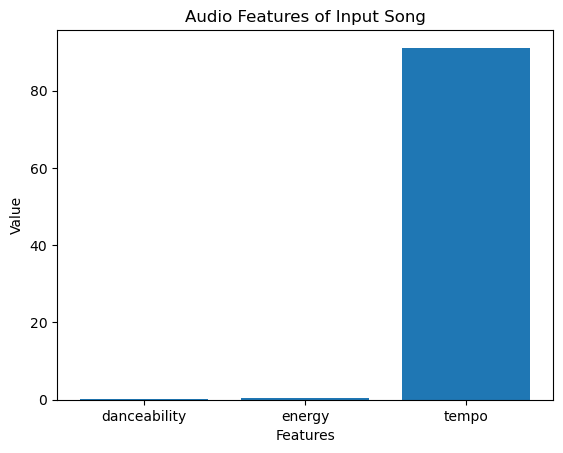

In [30]:
import matplotlib.pyplot as plt


idx = 0

features_names = ["danceability", "energy", "tempo"]
values = df.loc[idx, features_names]

plt.figure()
plt.bar(features_names, values)
plt.title("Audio Features of Input Song")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

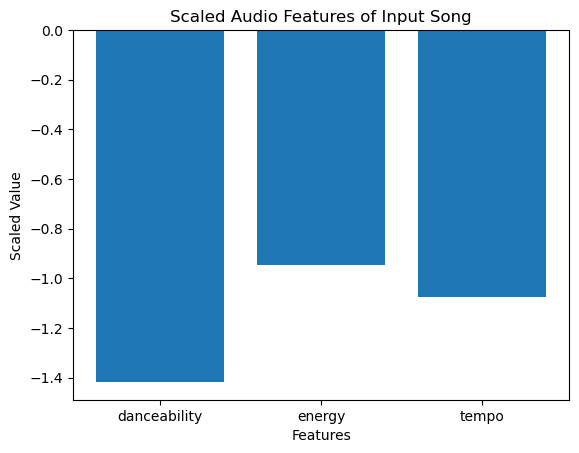

In [31]:

scaled_values = features[idx]

plt.figure()
plt.bar(features_names, scaled_values)
plt.title("Scaled Audio Features of Input Song")
plt.xlabel("Features")
plt.ylabel("Scaled Value")
plt.show()